In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Practical Exam Datasets/K-Means & Hirarchical Clustering/Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
selected_cols=df[['EstimatedSalary']]

In [9]:
sc=StandardScaler()
scaled_cols=sc.fit_transform(selected_cols)

In [10]:
clusters=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=10)
    kmeans.fit(scaled_cols)
    clusters.append(kmeans.inertia_)

In [11]:
clusters

[400.00000000000006,
 142.44880328159493,
 51.29785089171939,
 28.85213178215662,
 17.23154750485619,
 12.662204122267012,
 8.733561638879163,
 6.97652218592144,
 5.483840740320645,
 4.573662431648914,
 3.6226502535875844,
 2.7654823297403306,
 2.4406263826299224,
 2.1533333895294193,
 1.8536880129989606,
 1.6866508592079565,
 1.4292972648100275,
 1.3023938282374639,
 1.186482034604452,
 1.0451450880664466,
 0.9596616249884452,
 0.816870777095543,
 0.7383335660244661,
 0.6870934669835514]

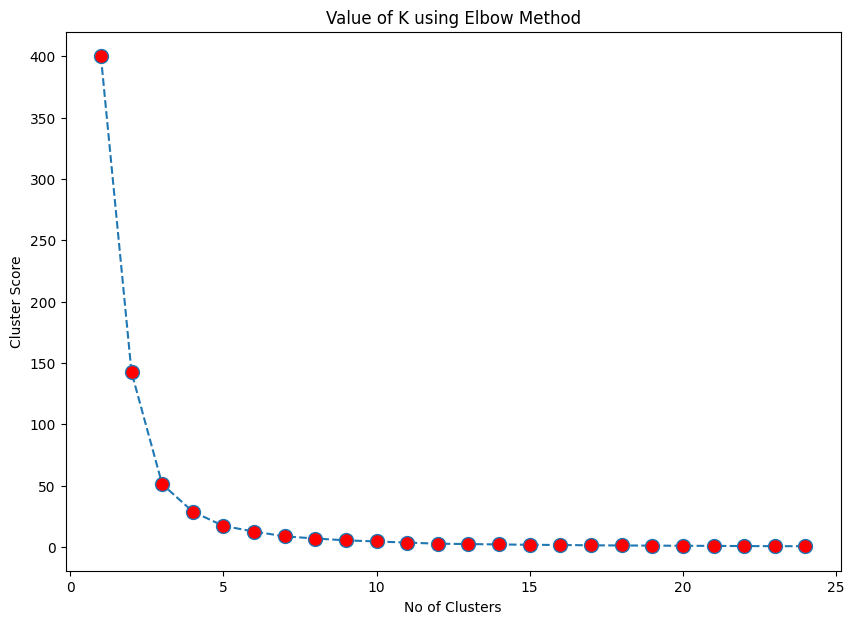

In [22]:
plt.figure(figsize=(10,7))
plt.plot(range(1,25),clusters,marker='o',markersize=10,markerfacecolor='red',linestyle='--')
plt.title('Value of K using Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Cluster Score')
plt.show()

In [23]:
#here value of K is 4

In [24]:
kmeans=KMeans(n_clusters=4,random_state=10)

In [25]:
kmeans.fit(scaled_cols)

C:\Users\madha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=10)

In [26]:
pred=kmeans.predict(scaled_cols)

In [27]:
pred

array([3, 3, 1, 1, 2, 1, 2, 0, 3, 1, 2, 1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 0, 3,
       2, 3, 2, 1, 0, 2, 3, 1, 2, 3, 1, 1, 1, 2, 3, 0, 3, 2, 1, 0, 2, 1,
       3, 2, 1, 2, 2, 3, 3, 0, 3, 0, 1, 3, 2, 3, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 3, 3, 2, 1, 3, 0, 2, 3, 2, 1, 2, 0, 3, 2, 3, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3,
       2, 2, 1, 1, 2, 0, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 1, 2, 1,
       1, 3, 1, 2, 3, 0, 2, 2, 3, 3, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 3,
       1, 3, 3, 3, 3, 2, 0, 1, 1, 1, 2, 1, 2, 3, 2, 3, 1, 2, 2, 1, 2, 3,
       2, 3, 3, 2, 0, 2, 2, 1, 0, 0, 0, 3, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 0, 1, 2, 3, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 3, 2, 2, 2, 3, 3, 2, 1, 2, 3, 0, 2,
       1, 0, 2, 2, 0, 2, 3, 2, 1, 1, 2, 0, 2, 0, 3,

In [28]:
df['Clusters']=pred

In [30]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Clusters
0,15624510,Male,19,19000,0,3
1,15810944,Male,35,20000,0,3
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,2
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,3
397,15654296,Female,50,20000,1,3
398,15755018,Male,36,33000,0,3


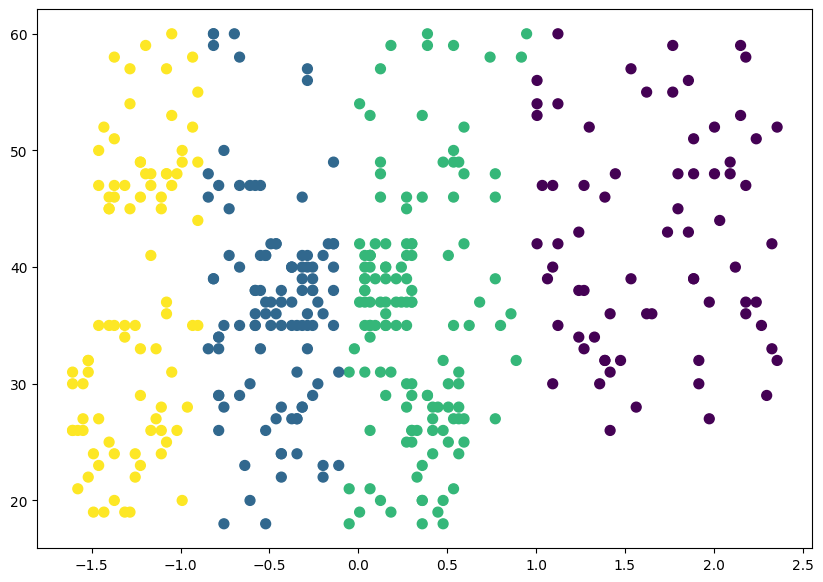

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_cols,df['Age'],c=df['Clusters'],marker='o',s=50)
plt.show()